# Classificador com Tensorflow

## Imports

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import keras as k
print(k.__version__)

2.4.3


In [3]:
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

## Import Data

In [5]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [6]:
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

## Divisão em Treino e Teste

In [7]:
train_data, test_data = imdb['train'], imdb['test']

### Divisão em Labels e Sentences

In [8]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []



for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [9]:
training_sentences[0]

'b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."'

In [10]:
training_labels[0]

0

# Criando objeto Labels NumPy array

In [11]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [12]:
training_labels_final

array([0, 0, 0, ..., 0, 0, 1])

In [13]:
testing_labels_final

array([1, 1, 0, ..., 0, 1, 1])

# Hiperparametros

In [14]:
vocab_size = 10000  #Tamanho do vocabulário
embedding_dim = 16   #Tamanho da dimensão
max_length = 120 # Tamanho do comprimento da sequencia de pad_sequences
trunc_type='post'
oov_tok = "<OOV>"

# Tokenizer

### Training

In [15]:
# Instanciar Tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)


# Função tokenizer para lista de frases
tokenizer.fit_on_texts(training_sentences)

# Substitui palavras fora do vocabulário durante as chamadas text_to_sequence (OOV)
word_index = tokenizer.word_index

# Transforma cada texto em uma sequência de inteiros.
sequences = tokenizer.texts_to_sequences(training_sentences)

# Transforma uma lista de sequências em uma matriz Numpy 2D
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

### Testing

In [16]:
# Transforma cada texto em uma sequência de inteiros.
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

# Transforma uma lista de sequências em uma matriz Numpy 2D
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [17]:
print(testing_sequences[0])

[59, 44, 25, 109, 13, 97, 4115, 16, 742, 4370, 10, 14, 316, 5, 2, 593, 354, 16, 1864, 1212, 1, 16, 680, 7499, 5595, 1, 773, 6, 13, 1037, 1, 1, 439, 491, 1, 4, 1, 334, 3610, 20, 229, 3, 15, 5796, 3, 15, 1646, 15, 102, 5, 2, 3597, 101, 11, 1450, 1528, 12, 251, 235, 11, 216, 2, 377, 6429, 3, 62, 95, 11, 174, 105, 11, 1528, 180, 12, 251, 37, 6, 1144, 1, 682, 7, 4452, 1, 4, 1, 334, 7, 37, 8367, 377, 5, 1420, 1, 13, 30, 64, 28, 6, 874, 181, 17, 4, 1050, 5, 12, 224, 3, 83, 4, 353, 33, 353, 5229, 5, 10, 6, 1340, 1160, 2, 5738, 1, 3, 1, 5, 10, 175, 328, 7, 1319, 3989, 4, 798, 1946, 5, 4, 250, 2710, 158, 3, 2, 361, 31, 187, 25, 1170, 499, 610, 5, 2, 122, 2, 356, 1398, 7725, 30, 1, 881, 38, 4, 20, 39, 12, 1, 4, 1, 334, 7, 4, 20, 634, 60, 48, 214]


In [18]:
print(testing_padded[0])

[  11 1450 1528   12  251  235   11  216    2  377 6429    3   62   95
   11  174  105   11 1528  180   12  251   37    6 1144    1  682    7
 4452    1    4    1  334    7   37 8367  377    5 1420    1   13   30
   64   28    6  874  181   17    4 1050    5   12  224    3   83    4
  353   33  353 5229    5   10    6 1340 1160    2 5738    1    3    1
    5   10  175  328    7 1319 3989    4  798 1946    5    4  250 2710
  158    3    2  361   31  187   25 1170  499  610    5    2  122    2
  356 1398 7725   30    1  881   38    4   20   39   12    1    4    1
  334    7    4   20  634   60   48  214]


# Modelo Keras Bidirecional GRU

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [21]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 23s 18ms/step - loss: 0.6133 - accuracy: 0.6134 - val_loss: 0.3667 - val_accuracy: 0.8351
Epoch 2/50
782/782 [==============================] - 13s 17ms/step - loss: 0.2962 - accuracy: 0.8796 - val_loss: 0.3611 - val_accuracy: 0.8462
Epoch 3/50
782/782 [==============================] - 13s 17ms/step - loss: 0.2215 - accuracy: 0.9152 - val_loss: 0.3897 - val_accuracy: 0.8307
Epoch 4/50
782/782 [==============================] - 13s 17ms/step - loss: 0.1708 - accuracy: 0.9368 - val_loss: 0.4615 - val_accuracy: 0.8353
Epoch 5/50
782/782 [==============================] - 13s 17ms/step - loss: 0.1144 - accuracy: 0.9613 - val_loss: 0.4909 - val_accuracy: 0.8301
Epoch 6/50
782/782 [==============================] - 13s 17ms/step - loss: 0.0823 - accuracy: 0.9744 - val_loss: 0.5944 - val_accuracy: 0.8217
Epoch 7/50
782/782 [==============================] - 13s 17ms/step - loss: 0.0457 - accuracy: 0.9855 - val_loss: 0.7193 - val_accuracy:

In [22]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

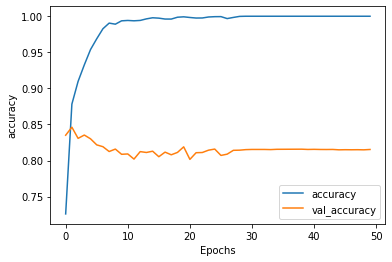

In [23]:
plot_graphs(history, 'accuracy')

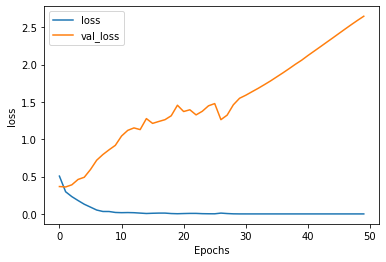

In [24]:
plot_graphs(history, 'loss')